In [12]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
from scripts import project_functions
df = project_functions.load_and_process("../data/raw/diabetes.csv")
df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,33.6,0.543,21,1
60,2,84,0.0,0.304,21,0
102,0,125,22.5,0.262,21,0
182,1,0,27.7,0.299,21,0
623,0,94,43.5,0.347,21,0
...,...,...,...,...,...,...
123,5,132,26.8,0.186,69,0
684,5,136,0.0,0.640,69,0
666,4,145,32.5,0.235,70,1
453,2,119,19.6,0.832,72,0


In [6]:
df.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,33.6,0.543,21,1
60,2,84,0.0,0.304,21,0
102,0,125,22.5,0.262,21,0
182,1,0,27.7,0.299,21,0
623,0,94,43.5,0.347,21,0


In [7]:
df.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 255 to 459
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 42.0 KB


In [28]:
df.shape

(768, 6)

<AxesSubplot:>

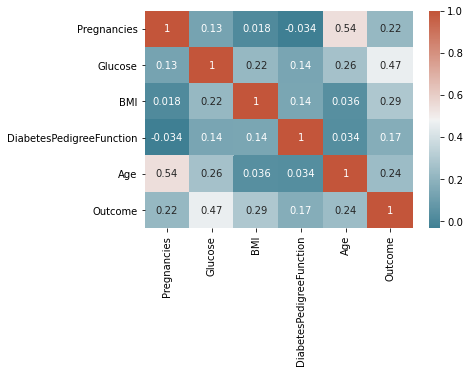

In [16]:
corrilation = df.corr()
sns.heatmap(corrilation, xticklabels=corrilation.columns, yticklabels=corrilation.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

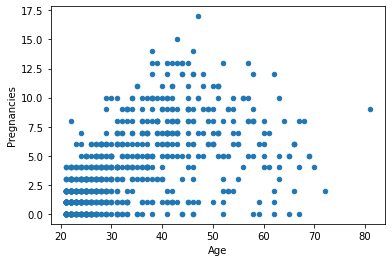

In [18]:
df.plot(kind='scatter',x='Age',y='Pregnancies')

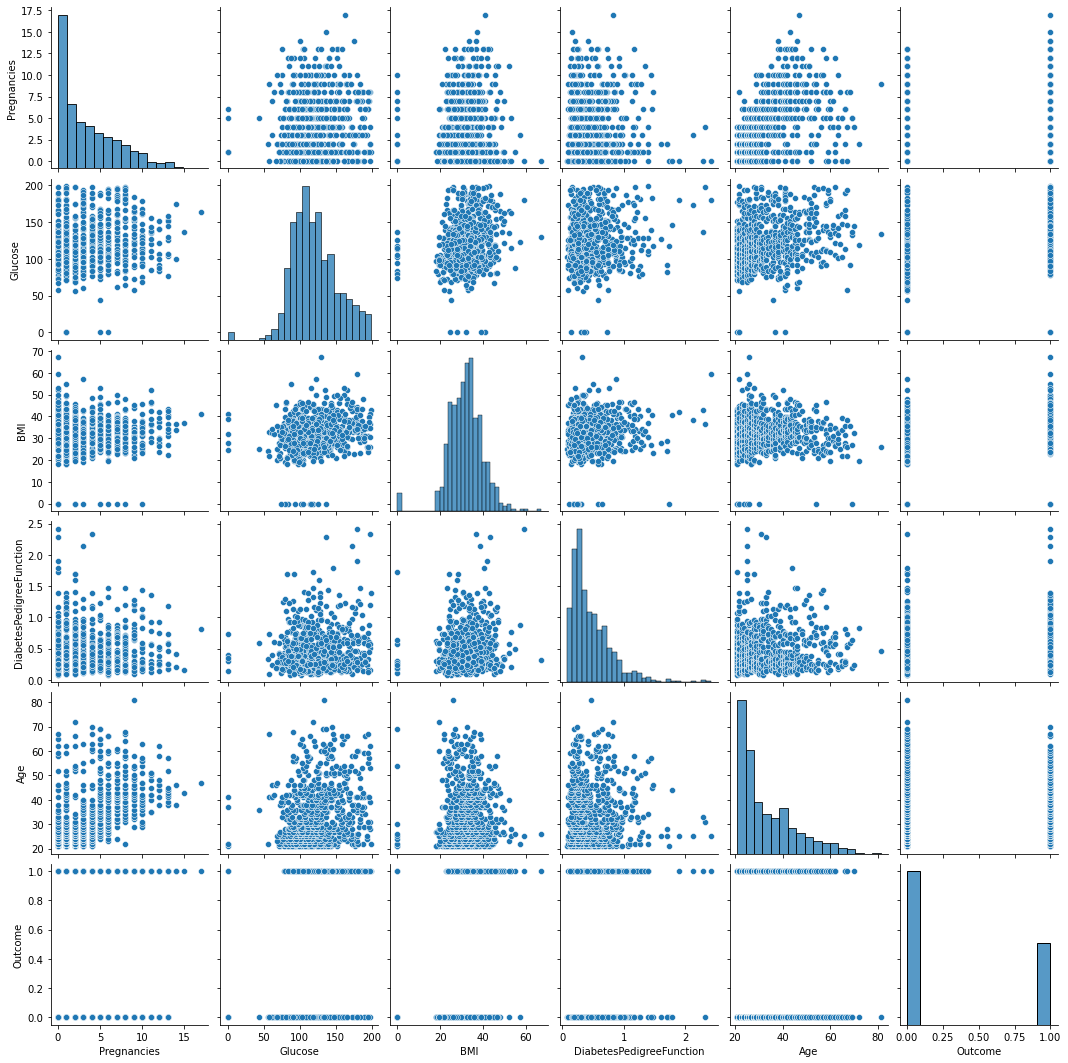

In [19]:
sns.pairplot(df)

<AxesSubplot:>

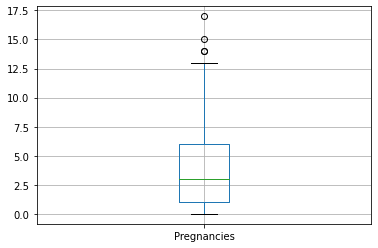

In [23]:
df.boxplot('Pregnancies')

<AxesSubplot:>

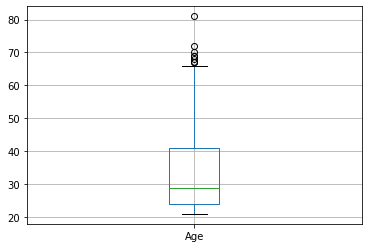

In [26]:
df.boxplot('Age')